# Capstone: Vital Statistics of Professional Athletes

## Analysis Notebook for pro baseball players

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

In [3]:
# Read in dataframes
all_baseball_df = pd.read_csv('./all_baseball_players.csv')
deceased_baseball_df = pd.read_csv('./deceased_baseball_players.csv')

In [4]:
all_baseball_df.tail()

,Unnamed: 0,all star,birth city,birth date,birth year,experience,first year,games,last year,link,name
14001,14001,0,"United States, FL, Tampa",1997-01-17,1997,1,2018,28,2018,/players/t/tuckeky01.shtml,Kyle Tucker
14002,14002,0,"Mexico, Sonora, Magdalena de Kino",1997-06-03,1997,1,2018,12,2018,/players/u/uriaslu01.shtml,Luis Urias
14003,14003,0,"Colombia, Cartagena",1997-02-15,1997,1,2018,10,2018,/players/v/vilorme01.shtml,Meibrys Viloria
14004,14004,0,"United States, NC, Durham",1997-12-20,1997,1,2018,3,2018,/players/w/wilsobr02.shtml,Bryse Wilson
14005,14005,0,"Dominican Republic, Distrito Nacional, Santo D...",1998-10-25,1998,1,2018,116,2018,/players/s/sotoju01.shtml,Juan Soto


In [5]:
deceased_baseball_df.head()

,Unnamed: 0,all star,death date,death year,experience,first year,games,last year,link,name
0,0,0,1919-04-28,1919,1,1880,1,1880,/players/a/ahearch01.shtml,Bill Ahearn
1,1,0,1919-07-24,1919,2,1884,48,1885,/players/b/begleed01.shtml,Ed Bagley
2,2,0,1919-03-24,1919,1,1889,1,1889,/players/b/batesjo01.shtml,John Bates
3,3,0,1919-10-14,1919,6,1894,527,1899,/players/b/blakeha01.shtml,Harry Blake
4,4,0,1919-08-21,1919,7,1886,288,1893,/players/c/clarkbo01.shtml,Bob Clark


### Merge DataFrames
Need to match birth and deaths, and then compute ages

In [6]:
baseball_merged = pd.merge(all_baseball_df,
                          deceased_baseball_df[['death date', 'death year', 'link']],
                          how='outer',
                          on='link')

In [7]:
baseball_merged.head()

,Unnamed: 0,all star,birth city,birth date,birth year,experience,first year,games,last year,link,name,death date,death year
0,0.0,0.0,"United States, MD, Baltimore",1900-06-03,1900.0,2.0,1924.0,12.0,1925.0,/players/b/baldwha01.shtml,Harry Baldwin,1958-01-23,1958.0
1,1.0,0.0,"United States, CO, Russell Gulch",1900-06-12,1900.0,2.0,1927.0,29.0,1928.0,/players/b/barnach01.shtml,Charlie Barnabe,1977-08-16,1977.0
2,2.0,0.0,"United States, NY, Ossining",1900-12-01,1900.0,2.0,1923.0,4.0,1924.0,/players/b/barneep01.shtml,Eppie Barnes,1980-11-17,1980.0
3,3.0,0.0,"United States, TX, Dallas",1900-01-09,1900.0,2.0,1929.0,7.0,1930.0,/players/b/barnefr01.shtml,Frank Barnes,1967-09-27,1967.0
4,4.0,0.0,"United States, NY, Fulton",1900-01-31,1900.0,1.0,1926.0,1.0,1926.0,/players/b/barneho01.shtml,Honey Barnes,1981-06-18,1981.0


In [8]:
# Quick and dirty computation of age
baseball_merged['approx age'] = baseball_merged['death year'] - baseball_merged['birth year']

### Group baseball players by year of birth and death 

In [9]:
baseball_birth_count = baseball_merged.groupby('birth year').count()

baseball_death_count = baseball_merged.groupby('death year').count()

#### Plot number of baseball players that were born or died in a given year

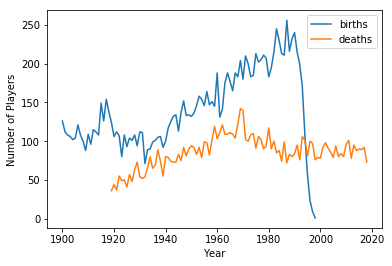

In [10]:
plt.plot(baseball_birth_count.index, baseball_birth_count['link'], label='births')
plt.plot(baseball_death_count.index, baseball_death_count['link'], label='deaths')
plt.xlabel('Year')
plt.ylabel('Number of Players')
plt.legend()

### Expected number of deaths of baseball players by year

In [11]:
baseball_exp_deaths = {}
for year in range(2004, 2016):
    try:
        ssa = pd.read_csv('./ssa_tables/death_pct_' + str(year) + '.csv')
    except:
        continue
    total = 0
    for i in range(1, ssa.shape[0]):
        birth_year = year - i
        if birth_year in baseball_birth_count.index:
            total += ssa.loc[i, 'male death pct'] * baseball_birth_count.loc[birth_year, 'link']
    baseball_exp_deaths[year] = total

In [12]:
baseball_exp_deaths

{2004: 114.85287000000001,
 2005: 115.26373000000001,
 2006: 115.60049000000001,
 2007: 115.71028000000001,
 2009: 115.87184,
 2010: 115.77704999999999,
 2011: 115.87147000000002,
 2013: 116.07978999999997,
 2014: 116.41507000000003,
 2015: 116.88391999999999}

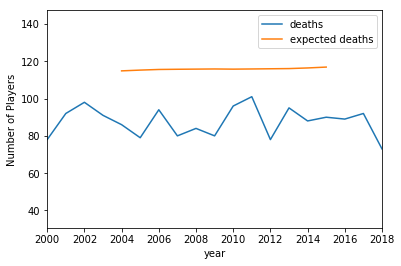

In [45]:
baseball_exp_deaths_df = pd.DataFrame.from_dict(baseball_exp_deaths, orient='index', columns=['exp deaths'])

plt.plot(baseball_death_count.index, baseball_death_count['link'], label='deaths')
plt.plot(baseball_exp_deaths_df, label='expected deaths')
plt.xlabel('year')
plt.ylabel('Number of Players')
plt.xlim(2000, 2018)
plt.legend()

### Comparison of distribution of ages at death of baseball players versus general population in a given year

In [13]:
us_live_births = pd.read_csv('./NCHS_-_Births_and_General_Fertility_Rates__United_States.csv')

us_live_births.set_index(['Year'], inplace=True)

In [14]:
for year in range(2004, 2016):
    try:
        death_pct = pd.read_csv('./ssa_tables/death_pct_' + str(year) + '.csv')
    except:
        continue
    us_est_deaths = [death_pct.loc[year-i+1, 'male death pct'] * us_live_births.loc[i, 'Birth Number'] 
                     for i in us_live_births.index if i <= year]
    probs = us_est_deaths[18:] / sum(us_est_deaths[18:])
    ages = len(us_est_deaths[18:])
    result = stats.ttest_ind(np.random.choice(range(18, 18+ages), 10000, replace=True, p=probs),
                             baseball_merged[baseball_merged['death year'] == year]['approx age'])
    print(year, result.pvalue)

2004 0.0019696468230519554
2005 0.0026480760084752653
2006 0.004987633264081081
2007 0.022734103809303484
2009 0.11161286683317276
2010 0.040211181640993965
2011 0.04589239116701307
2013 0.005207767420913189
2014 0.01418877303039066
2015 0.15648116997518477


(array([ 2.,  2.,  2.,  5.,  6.,  7., 15., 23., 17.,  7.]),
 array([ 37. ,  43.3,  49.6,  55.9,  62.2,  68.5,  74.8,  81.1,  87.4,
         93.7, 100. ]),
 <a list of 10 Patch objects>)

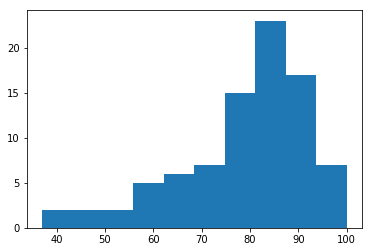

In [15]:
plt.hist(baseball_merged[baseball_merged['death year'] == 2004]['approx age'])

### What percentage of baseball players born in a given year are now deceased?

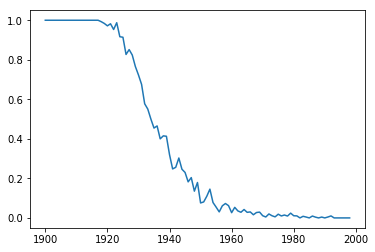

In [16]:
baseball_merged_counts = baseball_merged.groupby('birth year').count()

baseball_merged_counts.columns

baseball_merged_counts['pct deaths recorded'] = baseball_merged_counts['death year'] / baseball_merged_counts['link']

plt.plot(baseball_merged_counts['pct deaths recorded'])

In [17]:
baseball_merged_counts.loc[1920:1960, ['link', 'death year', 'pct deaths recorded']]

,link,death year,pct deaths recorded
birth year,,,
1920.0,106,103,0.971698
1921.0,112,110,0.982143
1922.0,107,102,0.953271
1923.0,80,79,0.987500
1924.0,108,99,0.916667
1925.0,93,85,0.913978
1926.0,104,86,0.826923
1927.0,101,86,0.851485
1928.0,108,89,0.824074


### Average age at death of players who died in a particular year

In [32]:
baseball_merged.groupby('death year').mean()

,Unnamed: 0,all star,birth year,experience,first year,games,last year,approx age
death year,,,,,,,,
1919.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1920.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1921.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1922.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1923.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1924.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1925.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1926.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1927.0,76.000000,0.000000,1900.000000,1.000000,1921.000000,20.000000,1921.000000,27.000000


### Average age at death vs. length of career

In [88]:
died_since_2000 = baseball_merged[baseball_merged['death year'] > 1999]

In [89]:
died_since_2000.groupby('experience').count()['link']

experience
1.0     419
2.0     238
3.0     167
4.0     102
5.0      90
6.0     103
7.0      79
8.0      63
9.0      63
10.0     64
11.0     57
12.0     51
13.0     46
14.0     26
15.0     27
16.0     12
17.0     22
18.0     14
19.0     10
20.0      3
21.0      3
22.0      4
23.0      1
Name: link, dtype: int64

In [90]:
died_since_2000.groupby('experience').mean()['approx age']

experience
1.0     80.028640
2.0     77.924370
3.0     77.874251
4.0     77.715686
5.0     78.511111
6.0     76.514563
7.0     75.443038
8.0     76.777778
9.0     75.873016
10.0    78.562500
11.0    81.491228
12.0    76.019608
13.0    75.782609
14.0    76.500000
15.0    76.074074
16.0    73.333333
17.0    76.272727
18.0    77.000000
19.0    80.600000
20.0    79.000000
21.0    74.333333
22.0    81.000000
23.0    74.000000
Name: approx age, dtype: float64

### Can we predict whether a player born between 1930 and 1945 is still alive?

In [18]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, GridSearchCV

In [19]:
silent_baseball = baseball_merged[(baseball_merged['birth year'] >= 1930) & (baseball_merged['birth year'] <= 1945)]

In [20]:
silent_baseball.columns

Index(['Unnamed: 0', 'all star', 'birth city', 'birth date', 'birth year',
       'experience', 'first year', 'games', 'last year', 'link', 'name',
       'death date', 'death year', 'approx age'],
      dtype='object')

In [21]:
X = silent_baseball[['all star', 'birth year', 'experience', 'first year', 'games', 'last year']]
y = [(1 if np.isnan(year) else 0) for year in silent_baseball['death year']]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1978)

In [37]:
logistic_params = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1]
}

gs = GridSearchCV(
    LogisticRegression(),
    logistic_params, 
    verbose=1
)

gs_results = gs.fit(X_train, y_train)
gs.score(X_test, y_test)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    2.1s finished


0.5858823529411765

In [38]:
np.average(y)

0.5880966411314084

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [40]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)

dtc.score(X_test, y_test)

0.5670588235294117

In [41]:
cross_val_score(dtc, X_train, y_train)

array([0.55058824, 0.54716981, 0.52245863])

In [42]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.6

In [43]:
cross_val_score(rf, X_train, y_train)

array([0.57647059, 0.59433962, 0.58628842])

#### Try adding in height and weight

In [62]:
mlb_htwt = pd.read_csv('./data/mlb_ht_wt.csv')
silent_baseball_htwt = pd.merge(silent_baseball, mlb_htwt, how='left', on='link')

In [52]:
def to_inches(ht_string):
    ft_in = str(ht_string).split('-')
    return 12 * int(ft_in[0]) + int(ft_in[1])

In [63]:
silent_baseball_htwt['inches'] = [to_inches(x) for x in silent_baseball_htwt['height']]

In [64]:
silent_baseball_htwt['pounds'] = [int(str(x).replace('lb', '')) for x in silent_baseball_htwt['weight']]

In [68]:
X = silent_baseball_htwt[['all star', 'birth year', 'experience', 'first year', 'games', 'last year', 'inches', 'pounds']]
y = [(1 if np.isnan(year) else 0) for year in silent_baseball_htwt['death year']]

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1978)

In [70]:
logistic_params = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1]
}

gs = GridSearchCV(
    LogisticRegression(),
    logistic_params, 
    verbose=1
)

gs_results = gs.fit(X_train, y_train)
gs.score(X_test, y_test)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    3.9s finished


0.6023529411764705

In [71]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)

dtc.score(X_test, y_test)

0.5835294117647059

In [72]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.5811764705882353

#### What correlation is there between age at death and other features?

In [73]:
import seaborn as sns

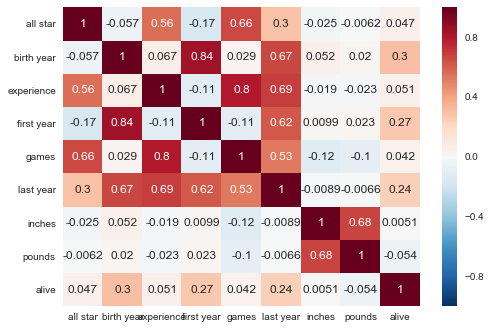

In [77]:
sns.heatmap(X.corr(), annot=True)

In [75]:
X['alive'] = y

C:\Users\ehkst\Anaconda3\envs\dsi\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Including age at death in Correlation plot restricted to deceased players:

In [84]:
X_deceased = silent_baseball_htwt[silent_baseball_htwt['approx age'].notnull()]

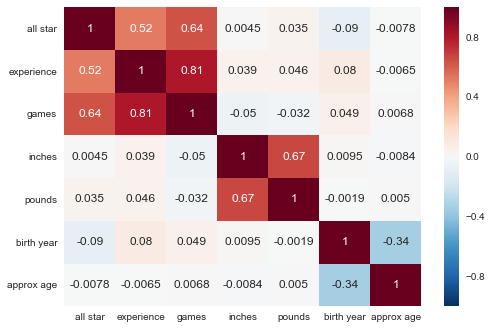

In [86]:
sns.heatmap(X_deceased[['all star', 'experience', 'games', 'inches', 'pounds', 'birth year', 'approx age']].corr(), annot=True)

#### Save merged table

In [35]:
baseball_merged.to_csv('./data/mlb_merged.csv')